In [1]:
import pygmo as pg
from pykep import epoch, util
from pykep.planet import jpl_lp
from pykep.planet import spice
from pykep.trajopt import mga_1dsm

In [3]:
def goto_mars():
    # We define an Earth-Mars problem (single-objective)
    seq = [jpl_lp('earth'),jpl_lp('mars')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=True,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=8, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands")
    archi.evolve(10)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands
Done!! Solutions found are:  [array([2356.9457903]), array([2441.60377337]), array([2442.07204719]), array([2448.36087943]), array([2446.84028657]), array([2419.80682071]), array([2433.53217378]), array([2401.88683964])]

The best solution with Dv = 2356.9457902993545:

First Leg: earth to mars
Departure: 2024-Sep-11 07:45:15.654169 (9020.323097849172 mjd2000) 
Duration: 842.9715530874919days
VINF: 4.999789190775605 km/sec
DSM after 238.8942196941633 days
DSM magnitude: 1308.7451772945903m/s

Arrival at mars
Arrival epoch: 2027-Jan-02 07:04:17.840928 (9863.294650936663 mjd2000) 
Arrival Vinf: 1047.8833633126217m/s
Total mission time: 2.3079303301505596 years


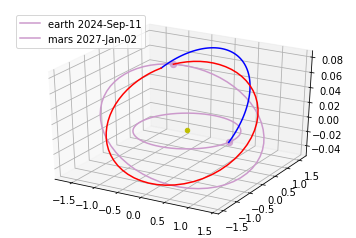

In [4]:
goto_mars()

In [ ]:
def goto_moon():
    # We define an Earth-Mars problem (single-objective)
    seq = [spice('EARTH'),spice('MOON','EARTH')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=False,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=12, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 12 parallel islands")
    archi.evolve(10)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

In [ ]:
    goto_moon()

In [1]:
import sys
sys.path

['',
 'C:\\Users\\oisin\\Anaconda3\\python36.zip',
 'C:\\Users\\oisin\\Anaconda3\\DLLs',
 'C:\\Users\\oisin\\Anaconda3\\lib',
 'C:\\Users\\oisin\\Anaconda3',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\oisin\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\oisin\\.ipython']

In [2]:
epoch(6700)

2018-May-06 00:00:00

In [4]:
x = jpl_lp('earth')

In [13]:
r,v=x.eph(epoch(6700))

In [14]:
r

(-106359704766.69928, -107043020626.04843, 4465162.394428717)

In [18]:
from pykep.planet import jpl_lp
class space:
    def __init__(self):
        self.planets = [jpl_lp('earth'), jpl_lp('mars'), ]

In [17]:
x= space()

RuntimeError: unknown planet name: sun